## Exploratory Data Analysis: House Price Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("house_prices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# df.isnull().sum() # 20-30% missing, drop the column, rows
df.count() / len(df) >= 0.7

Id               True
MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 81, dtype: bool

In [8]:
# Drop column if 30% is missing
df2 = df[[col for col in df if df[col].count()/len(df) >= 0.3]]
del df2['Id']

In [11]:
print("Columns Dropped: ", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")

Columns Dropped:  Id, Alley, PoolQC, Fence, MiscFeature, 

In [13]:
round(df2.describe(), 2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


/tmp/ipykernel_10606/660397930.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], bins=100, hist_kws = {'alpha':0.5})


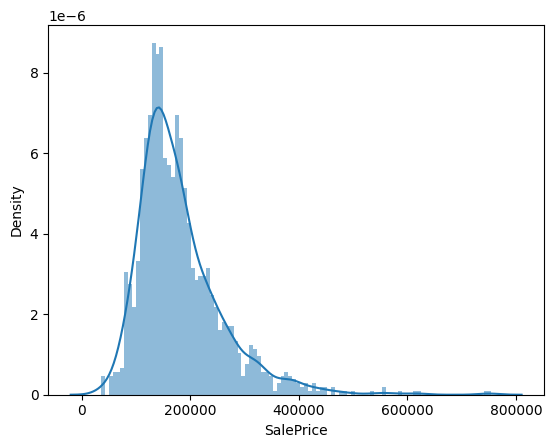

In [15]:
sns.distplot(df['SalePrice'], bins=100, hist_kws = {'alpha':0.5})
plt.show()

In [16]:
df_num = df2.select_dtypes(exclude=['O']) # Excluding objects
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

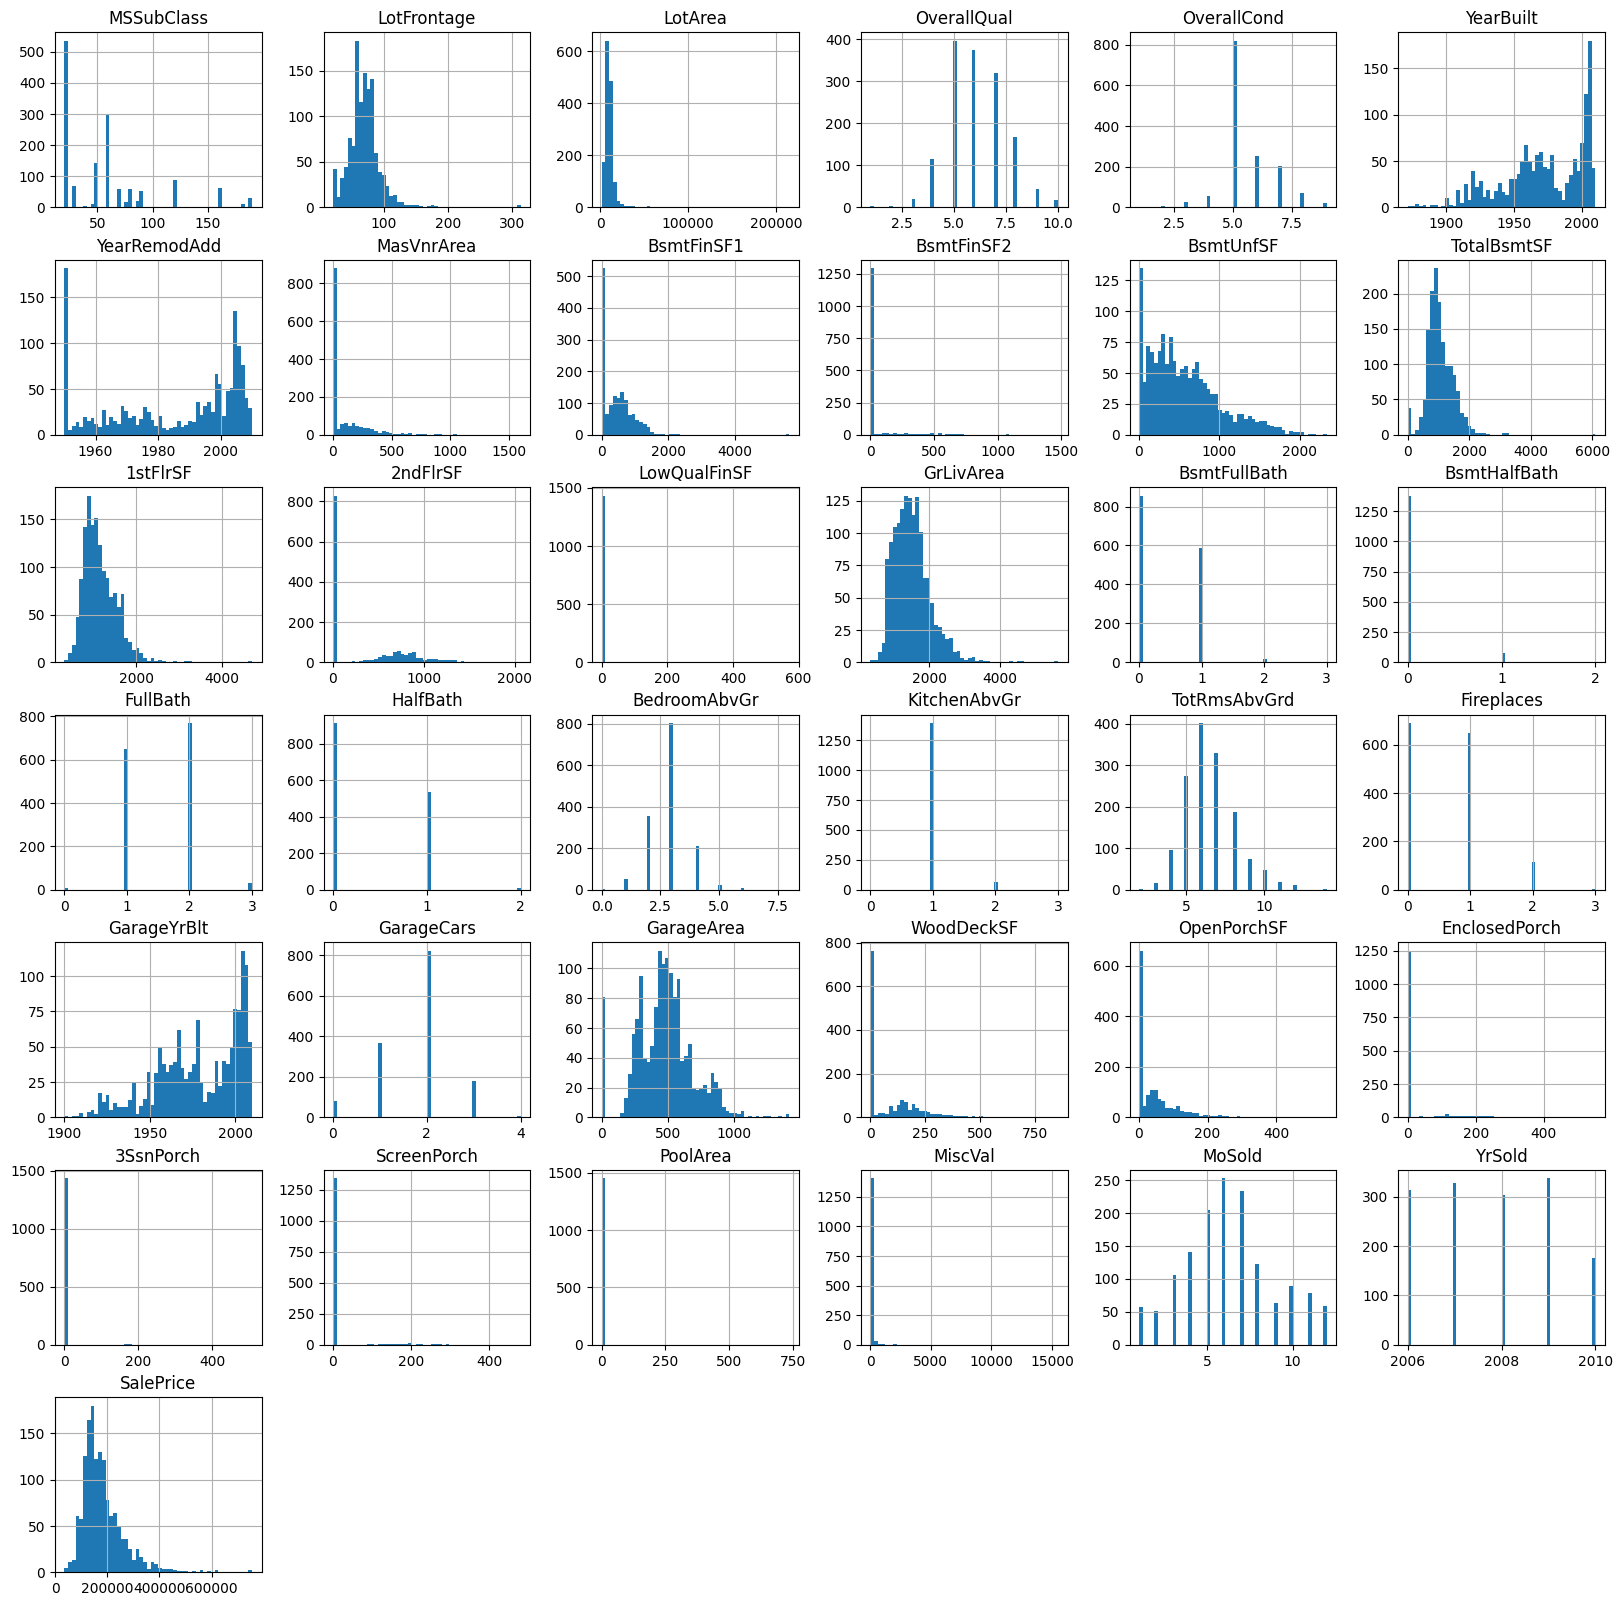

In [17]:
df_num.hist(figsize=(20,20), bins=50, xlabelsize=10, ylabelsize=10)
plt.show()

### Correlation between numerical values

In [18]:
df_num_corr = df_num.corr()['SalePrice'][:-1]

<Axes: >

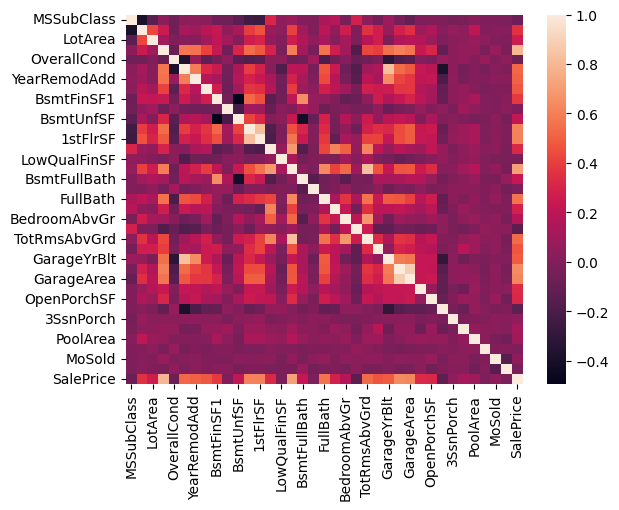

In [20]:
sns.heatmap(df_num.corr())

In [21]:
# Strong correlation with sale price
important_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

In [23]:
print(f"There are {len(important_features)} strongly correlated features with Sale Price")
important_features

There are 10 strongly correlated features with Sale Price


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

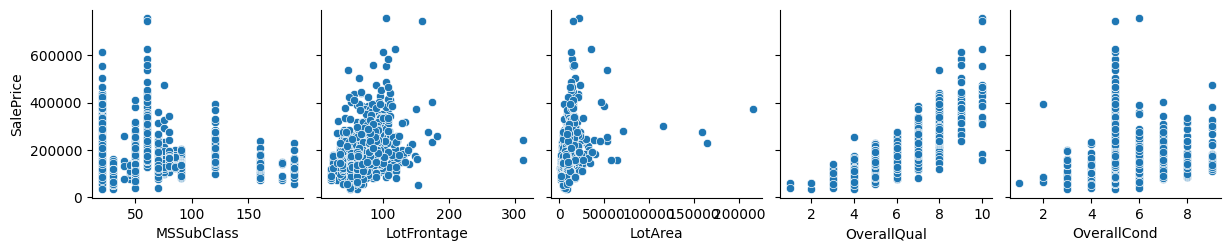

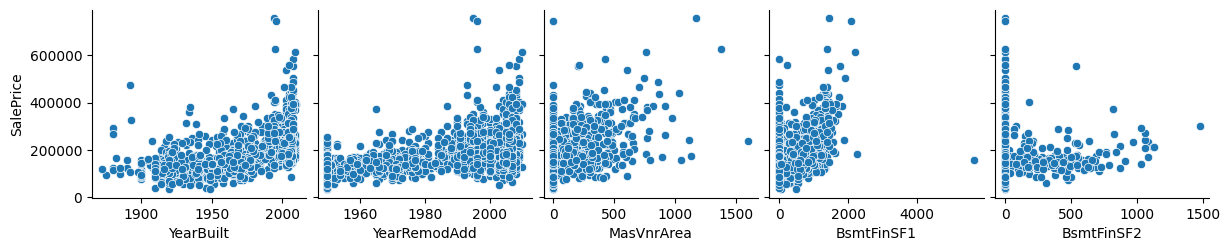

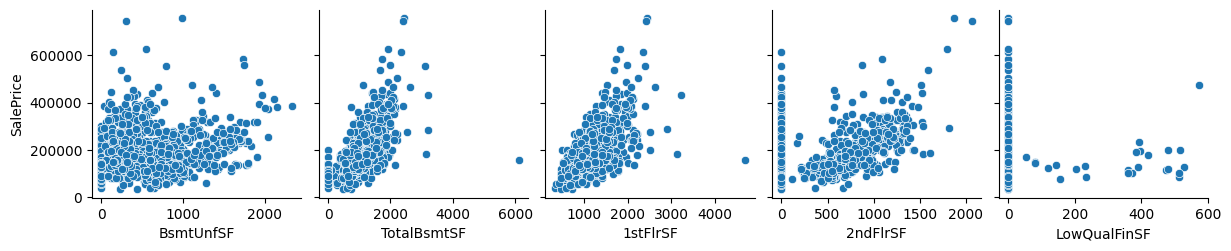

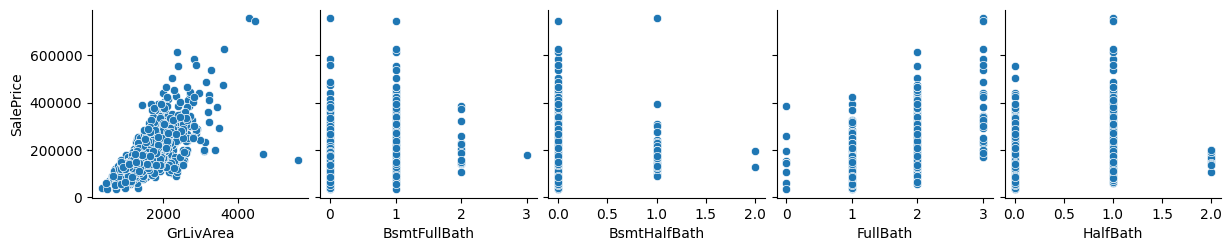

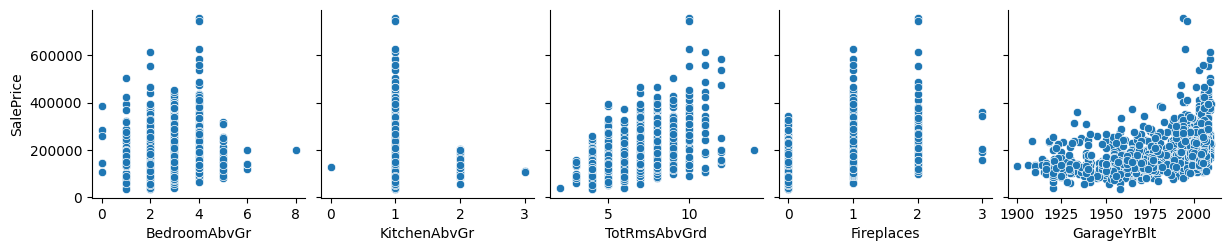

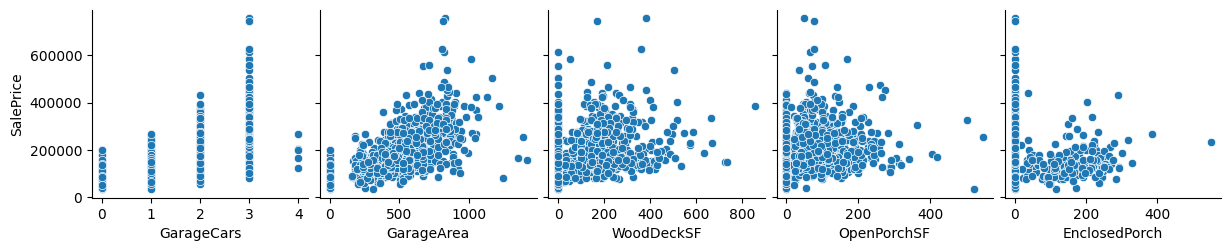

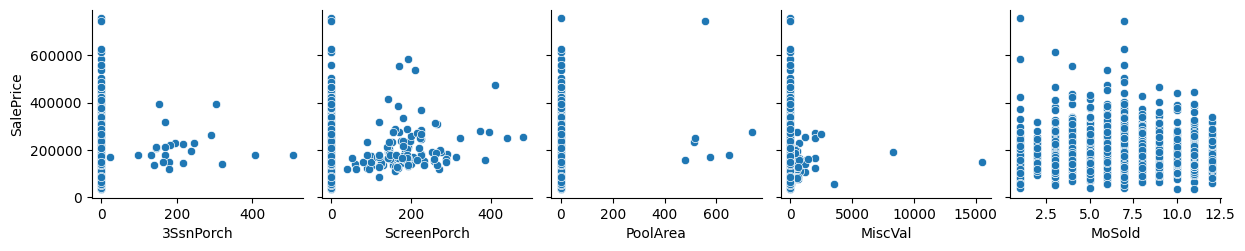

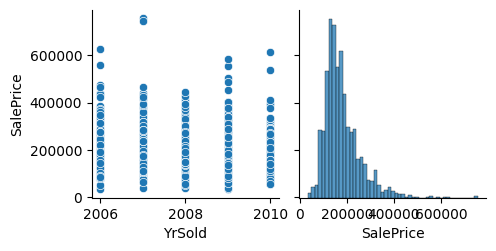

In [24]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, x_vars = df_num.columns[i:i+5], y_vars = ['SalePrice'])

In [25]:
import operator

In [26]:
ind_feat_df = []
for i in range(0, len(df_num.columns)-1):
    temp = df_num[[df_num.columns[i], 'SalePrice']]
    temp = temp[temp[df_num.columns[i]] != 0]
    ind_feat_df.append(temp)

In [27]:
ind_feat_df

[      MSSubClass  SalePrice
 0             60     208500
 1             20     181500
 2             60     223500
 3             70     140000
 4             60     250000
 ...          ...        ...
 1455          60     175000
 1456          20     210000
 1457          70     266500
 1458          20     142125
 1459          20     147500
 
 [1460 rows x 2 columns],
       LotFrontage  SalePrice
 0            65.0     208500
 1            80.0     181500
 2            68.0     223500
 3            60.0     140000
 4            84.0     250000
 ...           ...        ...
 1455         62.0     175000
 1456         85.0     210000
 1457         66.0     266500
 1458         68.0     142125
 1459         75.0     147500
 
 [1460 rows x 2 columns],
       LotArea  SalePrice
 0        8450     208500
 1        9600     181500
 2       11250     223500
 3        9550     140000
 4       14260     250000
 ...       ...        ...
 1455     7917     175000
 1456    13175     210000
 1

In [28]:
all_corr = {feat.columns[0]: feat.corr()['SalePrice'][0] for feat in ind_feat_df}

/tmp/ipykernel_10606/65926808.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_corr = {feat.columns[0]: feat.corr()['SalePrice'][0] for feat in ind_feat_df}


In [30]:
all_corr = sorted(all_corr.items(), key=operator.itemgetter(1))
for (key, value) in all_corr:
    print(f"{key:>15}: {value:>15}")

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

In [31]:
important_feat = [key for key, value in all_corr if abs(value) >= 0.5]
print(f"There are {len(important_feat)} strongly correlated features with Sale Price")
important_feat

There are 11 strongly correlated features with Sale Price


['YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'GarageArea',
 'TotalBsmtSF',
 'GarageCars',
 '2ndFlrSF',
 'GrLivArea',
 'OverallQual']